# Car Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

## Importing dataset
1. Since data is in form of csv file we have to use pandas read_csv to load the data
2. Check whether any null values are there or not. if it is present then following can be done,
   Imputing data using Imputation method in sklearn
   Filling NaN values with mean, median and mode using fillna() method
3. Describe data --> which can give statistical analysis

In [2]:
df=pd.read_csv('car details v4.csv')
print("Shape:",df.shape)
df.head(3)

Shape: (2059, 20)


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [4]:
# Checking if there are any null values
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

### Handling null values

In [5]:
# For Engine column
df['Engine']=df['Engine'].fillna(df['Engine'].mode()[0])
# For Max Power column
df['Max Power']=df['Max Power'].fillna(df['Max Power'].mode()[0])
# For Max Torque column
df['Max Torque']=df['Max Torque'].fillna(df['Max Torque'].mode()[0])
# For Drivetrain column
df['Drivetrain']=df['Drivetrain'].fillna(df['Drivetrain'].mode()[0])
# For Length column
df['Length']=df['Length'].fillna(df['Length'].median())
# For Width column
df['Width']=df['Width'].fillna(df['Width'].median())
# For Height column
df['Height']=df['Height'].fillna(df['Height'].median())
# For Seating Capacity column
df['Seating Capacity']=df['Seating Capacity'].fillna(df['Seating Capacity'].mode()[0])
# For Fuel Tank Capacity column
df['Fuel Tank Capacity']=df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].mode()[0])

### Statistical Analysis

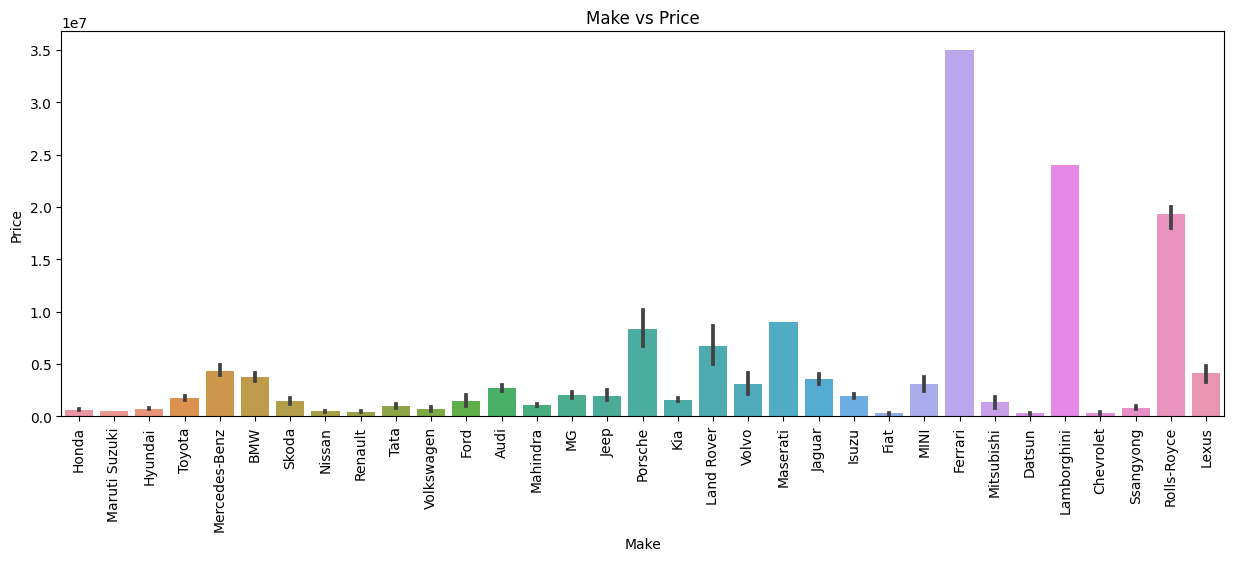

In [6]:
# Plotting barplot for Make vs Price
plt.figure(figsize=(15,5))
plt.title("Make vs Price")
sns.barplot(data=df,x='Make',y='Price')
plt.xticks(rotation='vertical')
plt.show()

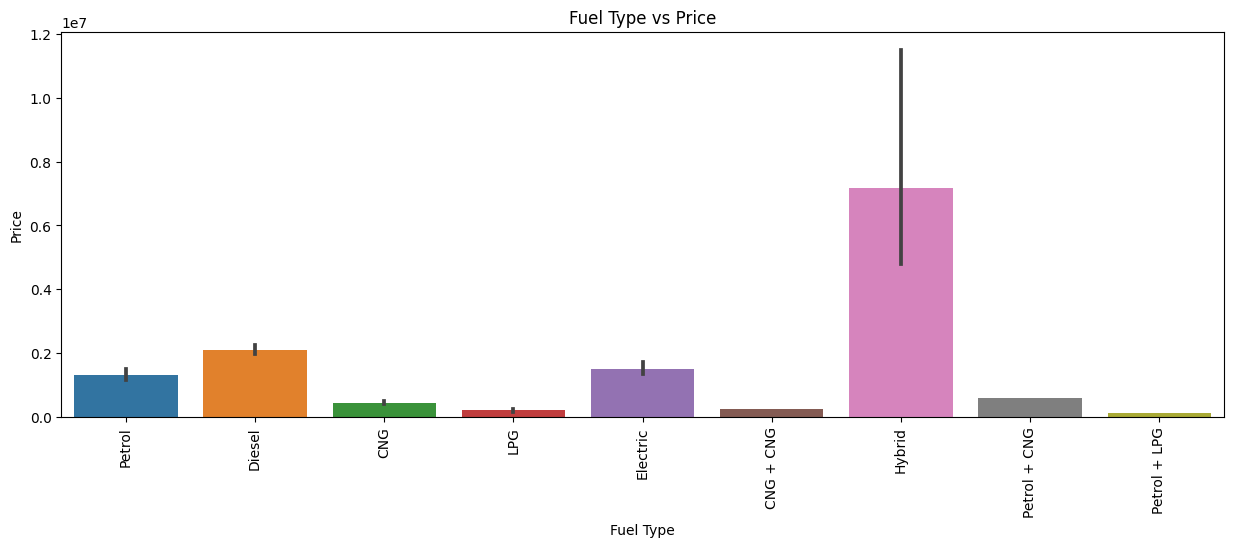

In [7]:
# Plotting barplot for Fuel Type vs Price
plt.figure(figsize=(15,5))
plt.title("Fuel Type vs Price")
sns.barplot(data=df,x='Fuel Type',y='Price')
plt.xticks(rotation='vertical')
plt.show()

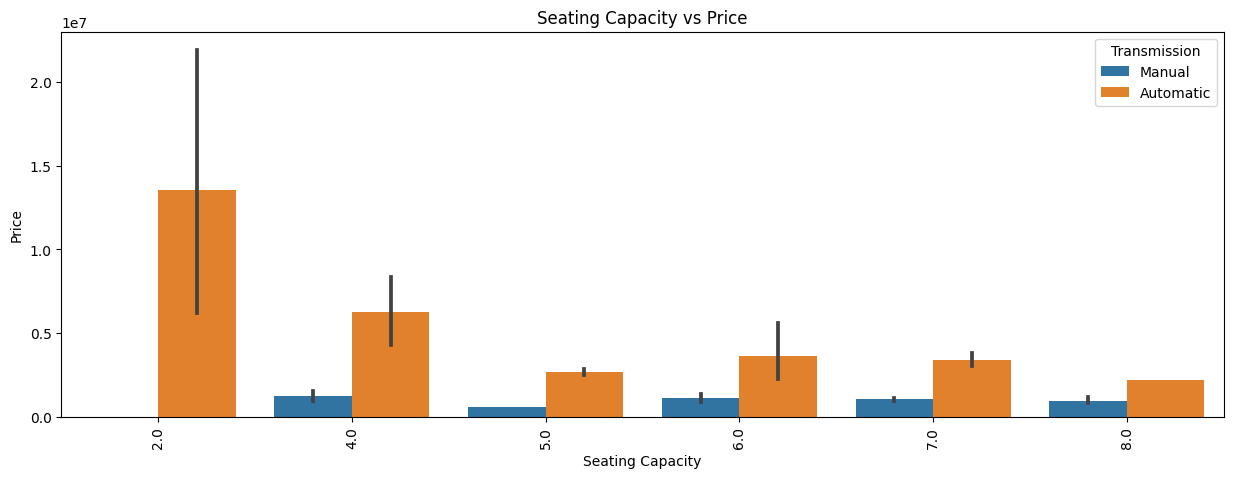

In [8]:
# Plotting barplot for Seating Capacity vs Price based on Transmission
plt.figure(figsize=(15,5))
plt.title("Seating Capacity vs Price")
sns.barplot(data=df,x='Seating Capacity',y='Price',hue='Transmission')
plt.xticks(rotation='vertical')
plt.show()

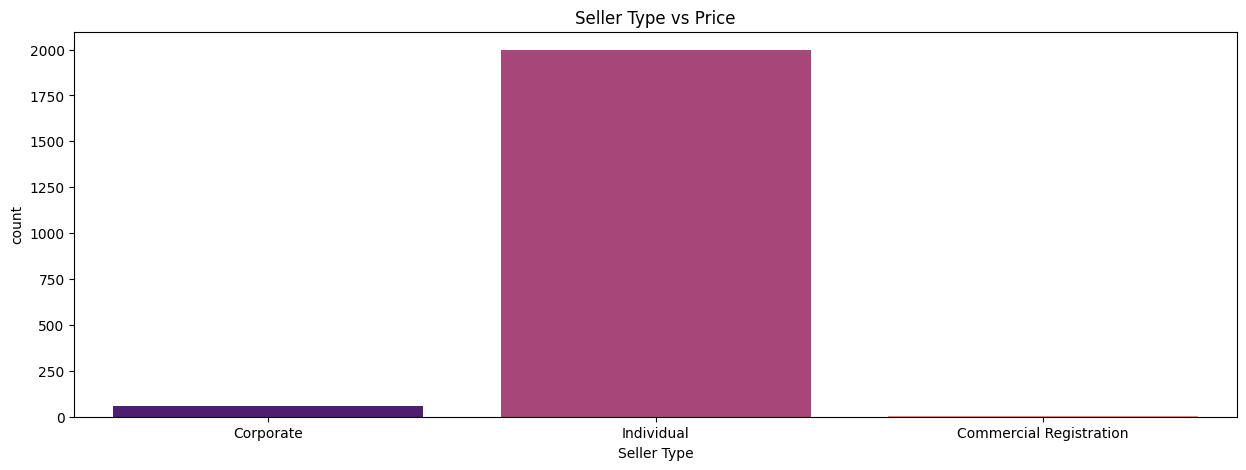

In [9]:
# Plotting countplot for Seller Type
plt.figure(figsize=(15,5))
plt.title("Seller Type vs Price")
sns.countplot(data=df,x='Seller Type',palette='magma')
plt.show()

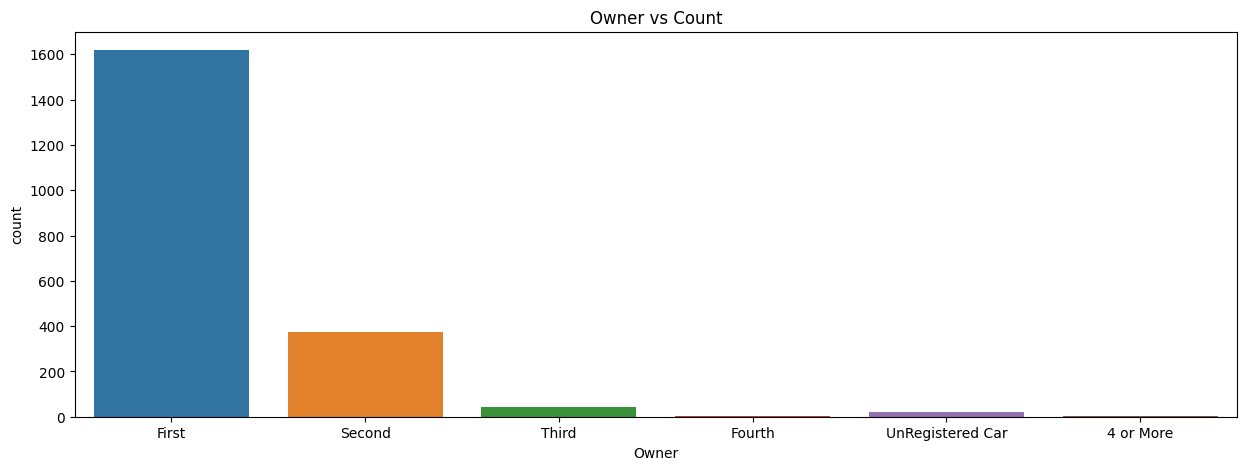

In [10]:
# Plotting countplot for Owner
plt.figure(figsize=(15,5))
plt.title("Owner vs Count")
sns.countplot(data=df,x='Owner')
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

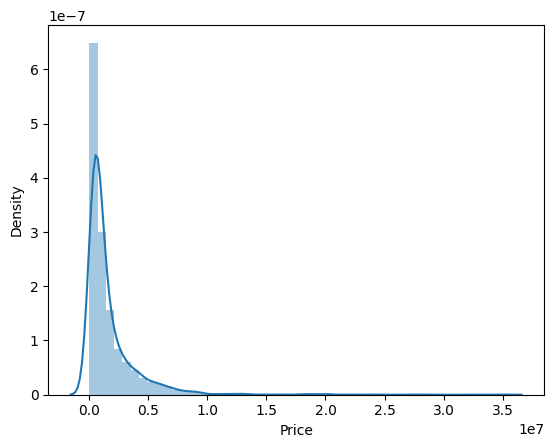

In [11]:
sns.distplot(df['Price'],kde=True)

In [12]:
# Handling Engine(in cc) column
df['Engine']=df['Engine'].str.split(' ',expand=True)[0]
df['Engine']=df['Engine'].astype('int64')

In [13]:
df['Max Power'].unique()

array(['87 bhp @ 6000 rpm', '74 bhp @ 4000 rpm', '79 bhp @ 6000 rpm',
       '82 bhp @ 6000 rpm', '148 bhp @ 3400 rpm', '91 bhp @ 6000 rpm',
       '181 bhp @ 5500 rpm', '188 bhp @ 4000 rpm', '177 bhp @ 5100 rpm',
       '84 bhp @ 3750 rpm', '67 bhp @ 5500 rpm', '103 bhp @ 6000 rpm',
       '138 bhp @ 3750 rpm', '103 bhp @ 5000 rpm', '67 bhp @ 6000 rpm',
       '47 bhp @ 6000 rpm', '122 bhp @ 6400 rpm', '68 bhp @ 5500 rpm',
       '118 bhp @ 6000 rpm', '58 bhp @ 6000 rpm', '85 bhp @ 6000 rpm',
       '89 bhp @ 6000 rpm', '126 bhp @ 4000 rpm', '124 bhp @ 6000 rpm',
       '89 bhp @ 4000 rpm', '62 bhp @ 5500 rpm', '84 bhp @ 6000 rpm',
       '69 bhp @ 4000 rpm', '168 bhp @ 3000 rpm', '203 bhp @ 4200 rpm',
       '138 bhp @ 6400 rpm', '177 bhp @ 4200 rpm', '165@5500',
       '105 bhp @ 3800 rpm', '83 bhp @ 6000 rpm', '169 bhp @ 3750 rpm',
       '101 bhp @ 3600 rpm', '190 bhp @ 4000 rpm', '171 bhp @ 3750 rpm',
       '120 bhp @ 4000 rpm', '181 bhp @ 5000 rpm', '117 bhp @ 6600 rpm',
      

In [14]:
# Handling Max Power(in bhp) column
df['Max Power']=df['Max Power'].str.split('@',expand=True)[0]
df['Max Power']=df['Max Power'].str.split(' ',expand=True)[0]
df['Max Power']=df['Max Power'].astype('float64')

In [15]:
# Dropping columns that are not needed
df.drop(['Make','Model','Location','Color','Max Torque','Drivetrain','Length','Width','Height'],axis=1,inplace=True)

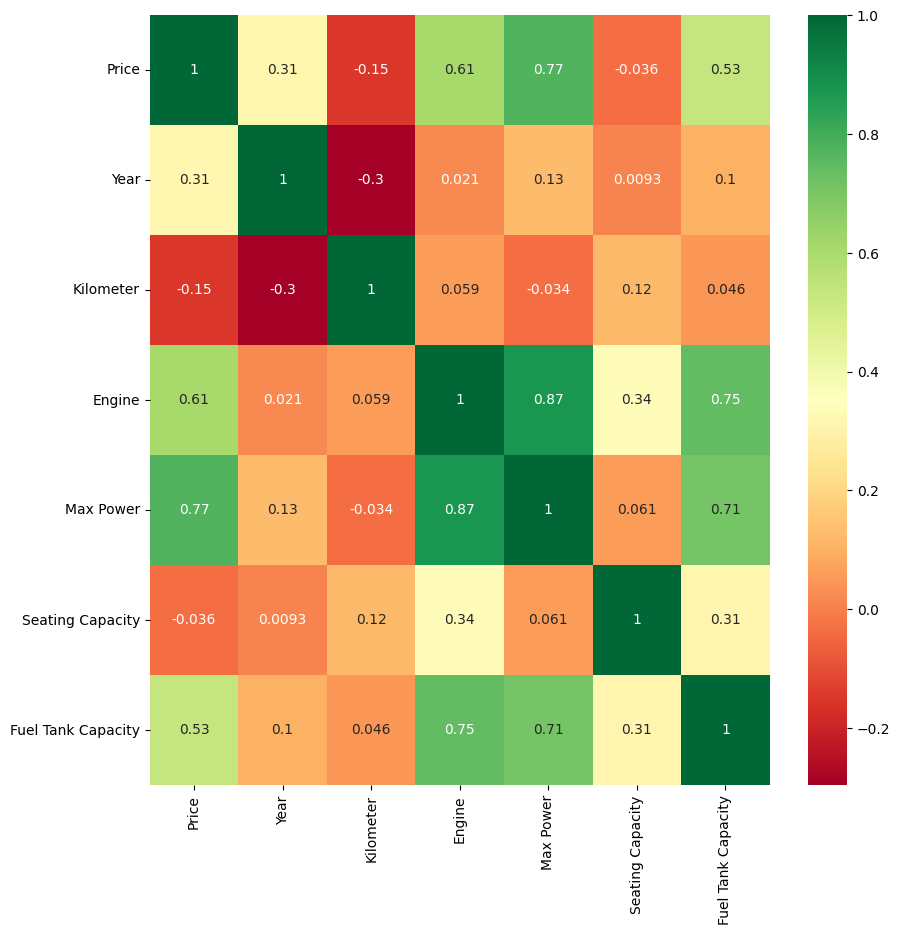

In [16]:
# Heat Map 
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [17]:
# We can see from heatmap that Kilometer and Seating Capacity are very less correlated to Price
df.drop(['Seating Capacity'],axis=1,inplace=True)

In [18]:
df.head()

,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine,Max Power,Fuel Tank Capacity
0,505000,2017,87150,Petrol,Manual,First,Corporate,1198,87.0,35.0
1,450000,2014,75000,Diesel,Manual,Second,Individual,1248,74.0,42.0
2,220000,2011,67000,Petrol,Manual,First,Individual,1197,79.0,35.0
3,799000,2019,37500,Petrol,Manual,First,Individual,1197,82.0,37.0
4,1950000,2018,69000,Diesel,Manual,First,Individual,2393,148.0,55.0


In [19]:
# remove special character(whitespaces)
df.columns = df.columns.str.replace(' ', '_')

In [20]:
df.head()

,Price,Year,Kilometer,Fuel_Type,Transmission,Owner,Seller_Type,Engine,Max_Power,Fuel_Tank_Capacity
0,505000,2017,87150,Petrol,Manual,First,Corporate,1198,87.0,35.0
1,450000,2014,75000,Diesel,Manual,Second,Individual,1248,74.0,42.0
2,220000,2011,67000,Petrol,Manual,First,Individual,1197,79.0,35.0
3,799000,2019,37500,Petrol,Manual,First,Individual,1197,82.0,37.0
4,1950000,2018,69000,Diesel,Manual,First,Individual,2393,148.0,55.0


In [21]:
# Handling spaces in Fuel_Type column
df['Fuel_Type']=df['Fuel_Type'].str.replace('+','')
df['Fuel_Type']=df['Fuel_Type'].str.replace('  ','_')

In [22]:
print(df['Fuel_Type'].unique())
print('\n')
print(df['Transmission'].unique())
print('\n')
print(df['Owner'].unique())
print('\n')
print(df['Seller_Type'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric' 'CNG_CNG' 'Hybrid' 'Petrol_CNG'
 'Petrol_LPG']


['Manual' 'Automatic']


['First' 'Second' 'Third' 'Fourth' 'UnRegistered Car' '4 or More']


['Corporate' 'Individual' 'Commercial Registration']


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               2059 non-null   int64  
 1   Year                2059 non-null   int64  
 2   Kilometer           2059 non-null   int64  
 3   Fuel_Type           2059 non-null   object 
 4   Transmission        2059 non-null   object 
 5   Owner               2059 non-null   object 
 6   Seller_Type         2059 non-null   object 
 7   Engine              2059 non-null   int64  
 8   Max_Power           2059 non-null   float64
 9   Fuel_Tank_Capacity  2059 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 161.0+ KB


In [24]:
# One hot encoding
variable=['Fuel_Type','Transmission','Seller_Type']
df=pd.get_dummies(data=df,columns=variable,drop_first=True)
df.head()

,Price,Year,Kilometer,Owner,Engine,Max_Power,Fuel_Tank_Capacity,Fuel_Type_CNG_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_LPG,Fuel_Type_Petrol,Fuel_Type_Petrol_CNG,Fuel_Type_Petrol_LPG,Transmission_Manual,Seller_Type_Corporate,Seller_Type_Individual
0,505000,2017,87150,First,1198,87.0,35.0,0,0,0,0,0,1,0,0,1,1,0
1,450000,2014,75000,Second,1248,74.0,42.0,0,1,0,0,0,0,0,0,1,0,1
2,220000,2011,67000,First,1197,79.0,35.0,0,0,0,0,0,1,0,0,1,0,1
3,799000,2019,37500,First,1197,82.0,37.0,0,0,0,0,0,1,0,0,1,0,1
4,1950000,2018,69000,First,2393,148.0,55.0,0,1,0,0,0,0,0,0,1,0,1


In [25]:
# Label Encoding
df['Owner']=df['Owner'].map({'UnRegistered Car':0,'First':1,'Second':2,'Third':3,'Fourth':4,'4 or More':5})

In [26]:
df.head()

,Price,Year,Kilometer,Owner,Engine,Max_Power,Fuel_Tank_Capacity,Fuel_Type_CNG_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_LPG,Fuel_Type_Petrol,Fuel_Type_Petrol_CNG,Fuel_Type_Petrol_LPG,Transmission_Manual,Seller_Type_Corporate,Seller_Type_Individual
0,505000,2017,87150,1,1198,87.0,35.0,0,0,0,0,0,1,0,0,1,1,0
1,450000,2014,75000,2,1248,74.0,42.0,0,1,0,0,0,0,0,0,1,0,1
2,220000,2011,67000,1,1197,79.0,35.0,0,0,0,0,0,1,0,0,1,0,1
3,799000,2019,37500,1,1197,82.0,37.0,0,0,0,0,0,1,0,0,1,0,1
4,1950000,2018,69000,1,2393,148.0,55.0,0,1,0,0,0,0,0,0,1,0,1


## Model Testing

In [27]:
# Seprating our dataset into independent and dependent  feature
X=df.drop('Price',axis=1)
y=df['Price']

In [28]:
X.columns

Index(['Year', 'Kilometer', 'Owner', 'Engine', 'Max_Power',
       'Fuel_Tank_Capacity', 'Fuel_Type_CNG_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_Hybrid', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Fuel_Type_Petrol_CNG', 'Fuel_Type_Petrol_LPG',
       'Transmission_Manual', 'Seller_Type_Corporate',
       'Seller_Type_Individual'],
      dtype='object')

In [29]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[1.14656756e-01 5.25548673e-02 1.90729334e-02 8.53496825e-02
 4.50976099e-01 1.06295852e-01 2.32326248e-08 4.77802070e-03
 2.75625892e-04 6.38562967e-03 3.86554516e-07 1.03797322e-02
 4.70928466e-07 2.92650310e-07 1.44822488e-01 2.11459902e-03
 2.33654090e-03]


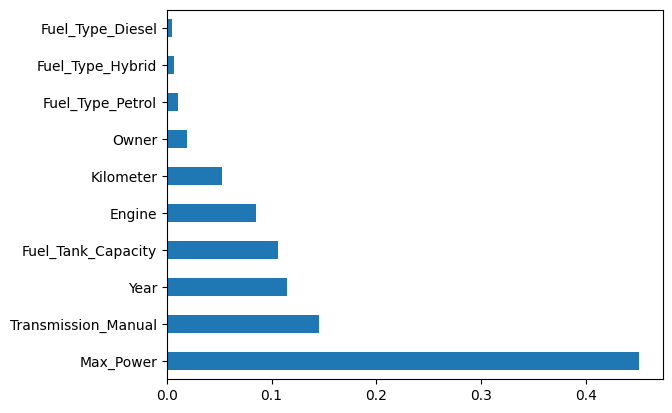

In [30]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(rf,X_train,y_train,cv=5,scoring='r2')
score1.mean()

0.8532205046054621

In [34]:
rf.score(X_train,y_train)

0.9802831911518763

### Hyperparameter Tuning

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='r2', n_iter = 10, cv = 5, verbose=1, n_jobs = 1)
# rf_random = GridSearchCV(estimator = rf, param_grid = random_grid,scoring='r2', cv = 5, verbose=1, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='r2', verbose=1)

In [38]:
pred=rf_random.predict(X_test)

<Axes: xlabel='Price', ylabel='Density'>

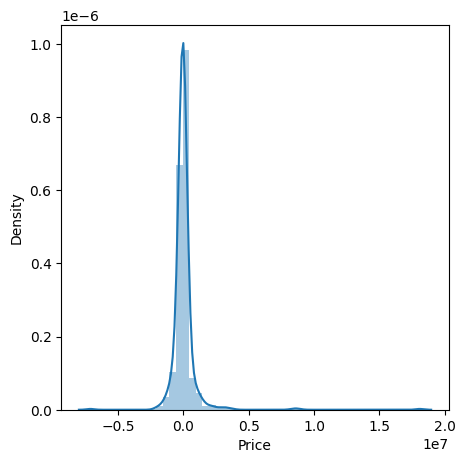

In [39]:
plt.figure(figsize=(5,5))
sns.distplot(y_test-pred)

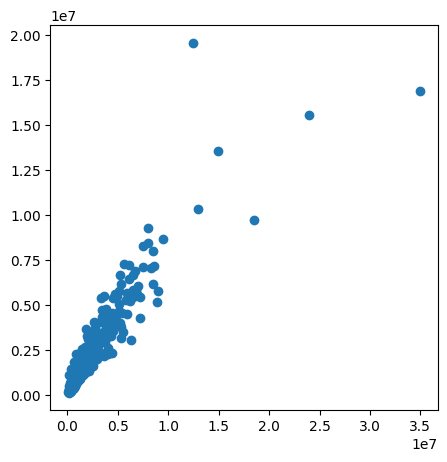

In [40]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,pred)

In [41]:
from sklearn.metrics import r2_score
print(r2_score(pred,y_test))

0.7315190898276779


In [42]:
import pickle
# open a file, where you want to store the data
file = open('test.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)
file.close()

In [43]:
mymodel = open('test.pkl','rb')
boosting = pickle.load(mymodel)
myprediction = boosting.predict(X_test)
r2_score(y_test, myprediction)

0.8191425325262027